# Análise de Dados de Artistas do X - Factor
A API do Spotify é uma interface poderosa que permite aos desenvolvedores acessar e interagir com os vastos recursos da plataforma de streaming musical Spotify. Com essa API, é possível integrar funcionalidades do Spotify em aplicativos, sites e serviços de terceiros, oferecendo uma experiência personalizada aos usuários.

##Principais Funcionalidades

**Autenticação:** A API utiliza o protocolo OAuth 2.0 para autenticação, permitindo que os usuários conectem suas contas do Spotify e autorizem aplicativos de terceiros a acessar seus dados.

**Busca de Músicas:** É possível buscar músicas, álbuns, artistas e playlists com facilidade. Os desenvolvedores podem implementar funcionalidades de busca personalizadas em seus aplicativos.

**Gerenciamento de Playlists:** A API permite criar, modificar e excluir playlists. Os usuários podem adicionar ou remover faixas de suas playlists, facilitando a personalização da experiência musical.

**Dados do Usuário:** A API oferece acesso a informações detalhadas sobre os usuários, como suas playlists, músicas salvas, e artistas favoritos, permitindo uma experiência mais rica e personalizada.

**Reprodução de Músicas:** É possível controlar a reprodução de músicas em dispositivos que têm o Spotify instalado, permitindo que aplicativos de terceiros interajam com a experiência de escuta do usuário.

**Informações sobre Músicas e Artistas:** A API fornece dados ricos sobre faixas, álbuns e artistas, incluindo descrições, popularidade, e estatísticas de reprodução, permitindo análises e insights aprofundados.

### Casos de Uso

Aplicativos de Recomendação Musical: Desenvolvedores podem criar aplicativos que analisam o histórico de escuta dos usuários e sugerem novas músicas ou artistas com base em suas preferências.

Experiências de Eventos: Integrar a API em eventos ao vivo para criar experiências interativas, como votação em tempo real de faixas a serem tocadas.

Ferramentas de Análise: Desenvolvedores podem construir ferramentas para visualizar e analisar dados de escuta, ajudando artistas e produtores a entenderem melhor seu público.

Mais informações no link: https://developer.spotify.com/

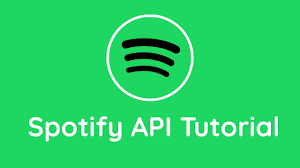

In [16]:
# Importação de bibliotecas
import pandas as pd

# Para usar a API do Spotify
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import csv # Para manipulação de csv
import numpy as np
import seaborn as sns
from scipy.stats import norm, skew # Biblioteca de normalização e validação de dados
import matplotlib.pyplot as plt

# Requisição na API
SPOTIPY_CLIENT_ID = 'SUA CLIENT_ID' #Escreva sua CLIENT_ID
SPOTIPY_CLIENT_SECRET = 'SUA CLIENT_SECRET' #Escreva sua CLIENT_SECRET

# Autenticação segura para acesso na API
auth_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

## Analisando Popularidade das Bandas do X Factor e os Membros
Este notebook foi desenvolvido exclusivamente para analisar a popularidade dos artistas envolvidos, utilizando dados coletados diretamente da API do Spotify. A proposta é explorar, comparar e visualizar informações relevantes como número de seguidores, gêneros musicais, nível de popularidade e outros atributos públicos fornecidos pela plataforma.

Com base nesses dados, é possível gerar insights estratégicos, identificar tendências musicais e compreender o perfil de cada artista dentro do cenário atual da indústria musical.

In [17]:
# --------- FUNÇÃO SEGURA PARA OBTER DADOS DO ARTISTA ---------
def get_artist_info_by_id(artist_id):
    artist = sp.artist(artist_id)

    artist_info = {
        'nome': artist['name'],
        'id': artist['id'],
        'popularidade': artist['popularity'],
        'seguidores': artist['followers']['total'],
        'gêneros': ', '.join(artist['genres']),
        'url_spotify': artist['external_urls']['spotify'],
        'imagem_principal': artist['images'][0]['url'] if artist['images'] else None,
        'tipo': artist['type'],
        'uri': artist['uri']
    }

    return pd.DataFrame([artist_info])

# --------- LISTA DE IDS DE ARTISTAS DO X FACTOR ---------
artist_ids = [
    '1l8Fu6IkuTP0U5QetQJ5Xt', '3e7awlrlDSwF3iM0WBjGMp', '4AK6F7OLvEQ5QYCBNiQWHq',
    '4nDoRrQiYLoBzwC5BhVJzF', '2cWZOOzeOm4WmBJRnD5R7I', '3J0BpFVUc9LeOIVeN5uNhU',
    '59KQTERLpPa7M0F25fRH6V', '6TXM1kV4L8DsDAkAfbOPYk', '24b0qNYNgeOfpP5rbljIB3',
    '0o18Cfq9RAxRqi5W4JOEPe', '79QUtAVxGAAoiWNlqBz9iy', '73KwqWuob0R53I14Vs56p9',
    '6KImCVD70vtIoJWnq6nGn3', '5ZsFI1h6hIdQRw2ti0hz81', '1Hsdzj7Dlq2I7tHP7501T4',
    '57WHJIHrjOE3iAxpihhMnp', '5pUo3fmmHT8bhCyHE52hA6'
]

# --------- BUSCANDO DADOS DE TODOS OS ARTISTAS ---------
df_todos_artistas = pd.concat(
    [get_artist_info_by_id(artist_id) for artist_id in artist_ids],
    ignore_index=True
)

# --------- RESULTADO FINAL ---------
df_todos_artistas

,nome,id,popularidade,seguidores,gêneros,url_spotify,imagem_principal,tipo,uri
0,Fifth Harmony,1l8Fu6IkuTP0U5QetQJ5Xt,71,16283038,,https://open.spotify.com/artist/1l8Fu6IkuTP0U5...,https://i.scdn.co/image/ab6761610000e5eb5acb3c...,artist,spotify:artist:1l8Fu6IkuTP0U5QetQJ5Xt
1,Little Mix,3e7awlrlDSwF3iM0WBjGMp,75,12254104,,https://open.spotify.com/artist/3e7awlrlDSwF3i...,https://i.scdn.co/image/ab6761610000e5eb08cd53...,artist,spotify:artist:3e7awlrlDSwF3iM0WBjGMp
2,One Direction,4AK6F7OLvEQ5QYCBNiQWHq,86,39305496,,https://open.spotify.com/artist/4AK6F7OLvEQ5QY...,https://i.scdn.co/image/5bb443424a1ad71603c43d...,artist,spotify:artist:4AK6F7OLvEQ5QYCBNiQWHq
3,Camila Cabello,4nDoRrQiYLoBzwC5BhVJzF,82,34840652,,https://open.spotify.com/artist/4nDoRrQiYLoBzw...,https://i.scdn.co/image/ab6761610000e5eb76470f...,artist,spotify:artist:4nDoRrQiYLoBzwC5BhVJzF
4,Normani,2cWZOOzeOm4WmBJRnD5R7I,69,2882330,,https://open.spotify.com/artist/2cWZOOzeOm4WmB...,https://i.scdn.co/image/ab6761610000e5ebdc6e85...,artist,spotify:artist:2cWZOOzeOm4WmBJRnD5R7I
5,Lauren Jauregui,3J0BpFVUc9LeOIVeN5uNhU,52,1265835,,https://open.spotify.com/artist/3J0BpFVUc9LeOI...,https://i.scdn.co/image/ab6761610000e5ebd5784d...,artist,spotify:artist:3J0BpFVUc9LeOIVeN5uNhU
6,Dinah Jane,59KQTERLpPa7M0F25fRH6V,39,422658,,https://open.spotify.com/artist/59KQTERLpPa7M0...,https://i.scdn.co/image/ab6761610000e5eb44a357...,artist,spotify:artist:59KQTERLpPa7M0F25fRH6V
7,Ally Brooke,6TXM1kV4L8DsDAkAfbOPYk,43,450494,,https://open.spotify.com/artist/6TXM1kV4L8DsDA...,https://i.scdn.co/image/ab6761610000e5eb718ddc...,artist,spotify:artist:6TXM1kV4L8DsDAkAfbOPYk
8,JADE,24b0qNYNgeOfpP5rbljIB3,63,231917,,https://open.spotify.com/artist/24b0qNYNgeOfpP...,https://i.scdn.co/image/ab6761610000e5ebc9cc38...,artist,spotify:artist:24b0qNYNgeOfpP5rbljIB3
9,Perrie,0o18Cfq9RAxRqi5W4JOEPe,49,151324,,https://open.spotify.com/artist/0o18Cfq9RAxRqi...,https://i.scdn.co/image/ab6761610000e5eb97a2b5...,artist,spotify:artist:0o18Cfq9RAxRqi5W4JOEPe


## Tratamento de Dados

A função utilizada para obter informações dos artistas a partir da API do Spotify retorna uma variedade de **dados e metadados** disponibilizados pela plataforma. Esses dados incluem informações detalhadas como IDs, nomes, URLs, popularidade, número de seguidores, tipos, URIs, gêneros musicais, imagens, entre outros campos técnicos.

No entanto, **nem todos esses dados são úteis diretamente para análise**. Por isso, é necessário realizar um **tratamento e filtragem dos dados**, a fim de selecionar apenas as informações mais relevantes para os objetivos deste estudo. Esse processo de limpeza e organização permite criar uma base de dados mais **enxuta, legível e adequada para análises estatísticas e visuais**, tornando o estudo mais objetivo e eficiente.

In [18]:
# Remover colunas que não serão utilizadas do DataFrame
df_todos_artistas = df_todos_artistas.drop(columns=['id','gêneros','url_spotify','uri'])

# Substituir o valor da coluna 'tipo' para 'banda' apenas para os artistas desejados
df_todos_artistas.loc[df_todos_artistas['nome'].isin(['Little Mix', 'Fifth Harmony', 'One Direction']), 'tipo'] = 'band'

# Exibir o DataFrame
df_todos_artistas

,nome,popularidade,seguidores,imagem_principal,tipo
0,Fifth Harmony,71,16283038,https://i.scdn.co/image/ab6761610000e5eb5acb3c...,band
1,Little Mix,75,12254104,https://i.scdn.co/image/ab6761610000e5eb08cd53...,band
2,One Direction,86,39305496,https://i.scdn.co/image/5bb443424a1ad71603c43d...,band
3,Camila Cabello,82,34840652,https://i.scdn.co/image/ab6761610000e5eb76470f...,artist
4,Normani,69,2882330,https://i.scdn.co/image/ab6761610000e5ebdc6e85...,artist
5,Lauren Jauregui,52,1265835,https://i.scdn.co/image/ab6761610000e5ebd5784d...,artist
6,Dinah Jane,39,422658,https://i.scdn.co/image/ab6761610000e5eb44a357...,artist
7,Ally Brooke,43,450494,https://i.scdn.co/image/ab6761610000e5eb718ddc...,artist
8,JADE,63,231917,https://i.scdn.co/image/ab6761610000e5ebc9cc38...,artist
9,Perrie,49,151324,https://i.scdn.co/image/ab6761610000e5eb97a2b5...,artist


## Análise de Popularidade das Bandas
Nesta análise, inicialmente serão avaliadas apenas as bandas, como Little Mix, Fifth Harmony e One Direction. Essas bandas serão destacadas por suas características específicas, permitindo uma comparação detalhada do seu desempenho na plataforma.

A escolha de focar primeiramente nas bandas visa uma análise mais direcionada a grupos musicais, que frequentemente apresentam dinâmicas e características diferenciadas em relação aos artistas solo.

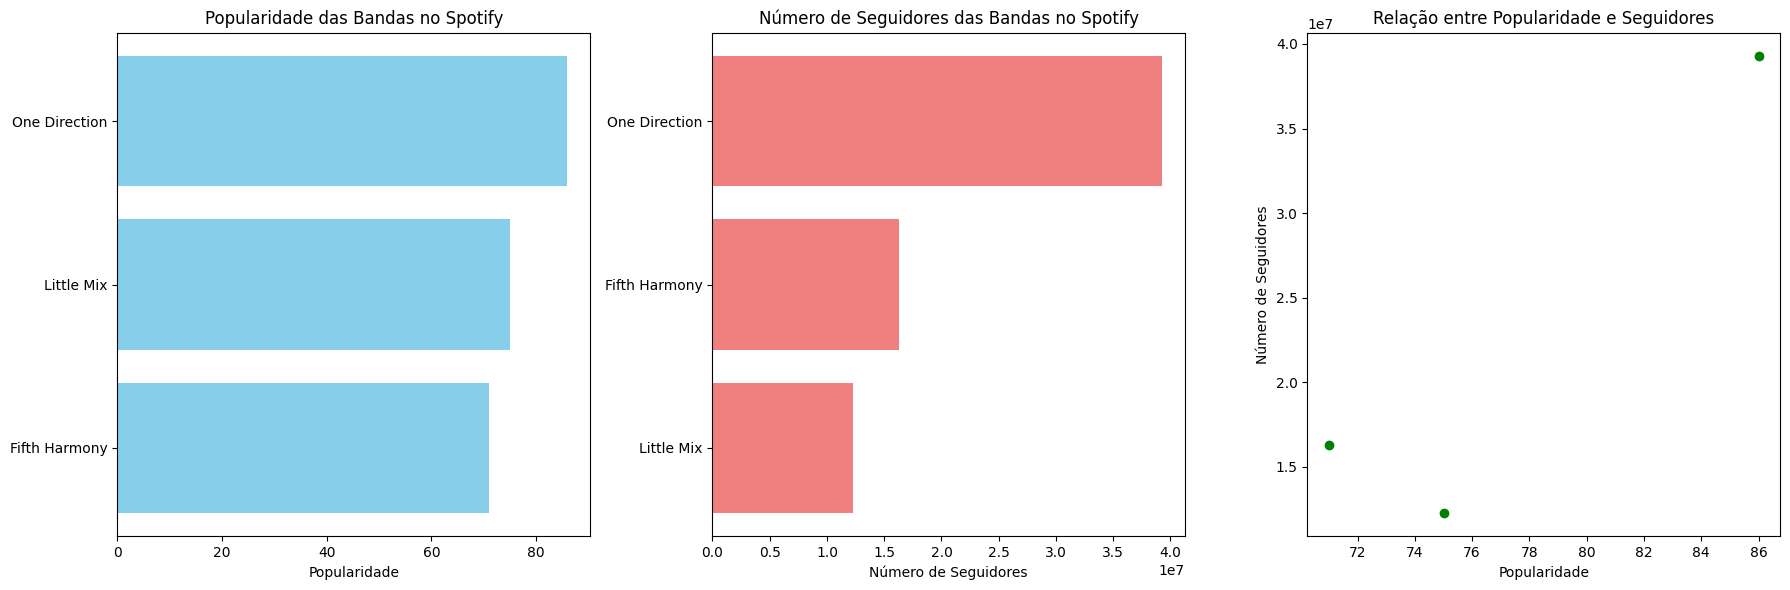

In [22]:
import matplotlib.pyplot as plt

# Filtrar somente as bandas
df_bandas = df_todos_artistas[df_todos_artistas['tipo'] == 'band']

# Ordenar as bandas por popularidade (maior para menor)
df_bandas_sorted_by_popularity = df_bandas.sort_values(by='popularidade', ascending=False)[['nome', 'popularidade']]

# Ordenar as bandas por número de seguidores (maior para menor)
df_bandas_sorted_by_followers = df_bandas.sort_values(by='seguidores', ascending=False)[['nome', 'seguidores']]

# Criar a figura e os subplots (3 gráficos lado a lado)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de popularidade
axes[0].barh(df_bandas_sorted_by_popularity['nome'], df_bandas_sorted_by_popularity['popularidade'], color='skyblue')
axes[0].set_xlabel('Popularidade')
axes[0].set_title('Popularidade das Bandas no Spotify')
axes[0].invert_yaxis()  # Para exibir a banda mais popular no topo

# Gráfico de número de seguidores
axes[1].barh(df_bandas_sorted_by_followers['nome'], df_bandas_sorted_by_followers['seguidores'], color='lightcoral')
axes[1].set_xlabel('Número de Seguidores')
axes[1].set_title('Número de Seguidores das Bandas no Spotify')
axes[1].invert_yaxis()  # Para exibir a banda com mais seguidores no topo

# Gráfico de dispersão (relação entre popularidade e seguidores)
axes[2].scatter(df_bandas['popularidade'], df_bandas['seguidores'], color='green')
axes[2].set_xlabel('Popularidade')
axes[2].set_ylabel('Número de Seguidores')
axes[2].set_title('Relação entre Popularidade e Seguidores')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

One Direction é a banda mais popular entre as três analisadas. Little Mix tem uma popularidade levemente maior que Fifth Harmony.

One Direction possui uma quantidade de seguidores significativamente maior que as outras duas bandas. Fifth Harmony vem em segundo, seguida por Little Mix.

Existe uma correlação positiva entre popularidade e número de seguidores. One Direction se destaca claramente com alta popularidade e um número muito elevado de seguidores. As outras duas bandas estão próximas no eixo da popularidade, mas têm menos seguidores, o que pode indicar que a popularidade atual nem sempre reflete o acúmulo de seguidores ao longo do tempo.

One Direction é, de longe, a banda com maior impacto no Spotify, tanto em termos de popularidade quanto de seguidores. A popularidade não cresce necessariamente na mesma proporção que o número de seguidores, mas há uma tendência de que bandas mais populares tenham mais seguidores.

## Analisando as Bandas de Maneira Solo

In [29]:
# Filtrar somente os artistas
df_artistas = df_todos_artistas[df_todos_artistas['tipo'] == 'artist']

# Criar coluna 'sexo'
df_artistas['sexo'] = df_artistas['nome'].apply(lambda x: 'feminino' if x in [
    'Camila Cabello', 'Normani', 'Dinah Jane', 'Lauren Jauregui',
    'Ally Brooke', 'JADE', 'Perrie', 'Jesy Nelson', 'Leigh-Anne'
] else 'masculino' if x in [
    'ZAYN', 'Harry Styles', 'Niall Horan', 'Liam Payne', 'Louis Tomlinson'
] else '')

# Criar coluna 'banda'
df_artistas['banda'] = df_artistas.apply(lambda row:
    'One Direction' if row['sexo'] == 'masculino' and row['nome'] in [
        'ZAYN', 'Harry Styles', 'Niall Horan', 'Liam Payne', 'Louis Tomlinson'
    ]
    else 'Fifth Harmony' if row['nome'] in [
        'Camila Cabello', 'Normani', 'Dinah Jane', 'Lauren Jauregui', 'Ally Brooke'
    ]
    else 'Little Mix' if row['nome'] in ['JADE', 'Perrie', 'Jesy Nelson', 'Leigh-Anne']
    else '', axis=1)

# Exibir o dataframe resultante
df_artistas

<ipython-input-29-088592d69b2b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_artistas['sexo'] = df_artistas['nome'].apply(lambda x: 'feminino' if x in [
<ipython-input-29-088592d69b2b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_artistas['banda'] = df_artistas.apply(lambda row:


,nome,popularidade,seguidores,imagem_principal,tipo,sexo,banda
3,Camila Cabello,82,34840652,https://i.scdn.co/image/ab6761610000e5eb76470f...,artist,feminino,Fifth Harmony
4,Normani,69,2882330,https://i.scdn.co/image/ab6761610000e5ebdc6e85...,artist,feminino,Fifth Harmony
5,Lauren Jauregui,52,1265835,https://i.scdn.co/image/ab6761610000e5ebd5784d...,artist,feminino,Fifth Harmony
6,Dinah Jane,39,422658,https://i.scdn.co/image/ab6761610000e5eb44a357...,artist,feminino,Fifth Harmony
7,Ally Brooke,43,450494,https://i.scdn.co/image/ab6761610000e5eb718ddc...,artist,feminino,Fifth Harmony
8,JADE,63,231917,https://i.scdn.co/image/ab6761610000e5ebc9cc38...,artist,feminino,Little Mix
9,Perrie,49,151324,https://i.scdn.co/image/ab6761610000e5eb97a2b5...,artist,feminino,Little Mix
10,Leigh-Anne,46,123565,https://i.scdn.co/image/ab6761610000e5eb57a6b5...,artist,feminino,Little Mix
11,Jesy Nelson,36,55221,https://i.scdn.co/image/ab6761610000e5eb55932d...,artist,feminino,Little Mix
12,Harry Styles,85,33635114,https://i.scdn.co/image/ab6761610000e5ebf7db7c...,artist,masculino,One Direction


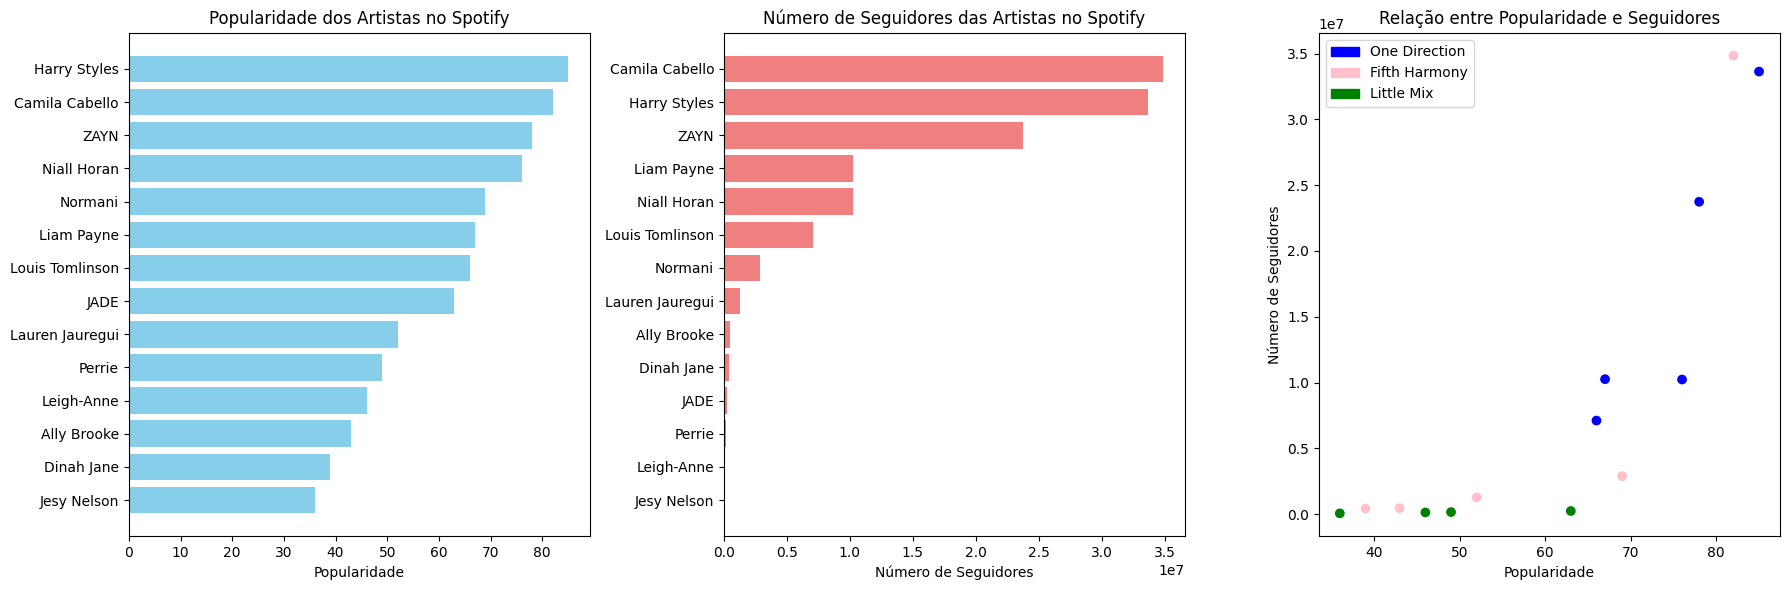

In [31]:
import matplotlib.pyplot as plt

# Ordenar os artistas por popularidade (maior para menor)
df_artistas_sorted_by_popularity = df_artistas.sort_values(by='popularidade', ascending=False)[['nome', 'popularidade']]

# Ordenar as bandas por número de seguidores (maior para menor)
df_artistas_sorted_by_followers = df_artistas.sort_values(by='seguidores', ascending=False)[['nome', 'seguidores']]

# Criar a figura e os subplots (3 gráficos lado a lado)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de popularidade
axes[0].barh(df_artistas_sorted_by_popularity['nome'], df_artistas_sorted_by_popularity['popularidade'], color='skyblue')
axes[0].set_xlabel('Popularidade')
axes[0].set_title('Popularidade dos Artistas no Spotify')
axes[0].invert_yaxis()

# Gráfico de número de seguidores
axes[1].barh(df_artistas_sorted_by_followers['nome'], df_artistas_sorted_by_followers['seguidores'], color='lightcoral')
axes[1].set_xlabel('Número de Seguidores')
axes[1].set_title('Número de Seguidores das Artistas no Spotify')
axes[1].invert_yaxis()

# Criar uma lista de cores baseada na banda de cada artista
cores = []
for banda in df_artistas['banda']:
    if banda == 'One Direction':
        cores.append('blue')  # azul para One Direction
    elif banda == 'Fifth Harmony':
        cores.append('pink')  # rosa para Fifth Harmony
    elif banda == 'Little Mix':
        cores.append('green')  # verde para Little Mix
    else:
        cores.append('gray')  # cor padrão para outros casos

# Gráfico de dispersão (relação entre popularidade e seguidores) com cores personalizadas
axes[2].scatter(df_artistas['popularidade'], df_artistas['seguidores'], c=cores)
axes[2].set_xlabel('Popularidade')
axes[2].set_ylabel('Número de Seguidores')
axes[2].set_title('Relação entre Popularidade e Seguidores')

# Opcional: adicionar legenda
import matplotlib.patches as mpatches
legenda = [
    mpatches.Patch(color='blue', label='One Direction'),
    mpatches.Patch(color='pink', label='Fifth Harmony'),
    mpatches.Patch(color='green', label='Little Mix')
]
axes[2].legend(handles=legenda)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

### **1. Popularidade dos Artistas no Spotify**

- **Harry Styles** é o artista mais popular individualmente.
- Ele é seguido de perto por **Camila Cabello** e **ZAYN**.
- Os artistas da One Direction dominam as primeiras posições, mostrando forte carreira solo.
- Integrantes do Little Mix (Leigh-Anne, Perrie, Jade, etc.) e algumas da Fifth Harmony (como Ally Brooke, Dinah Jane, Jesy Nelson) têm popularidade mais baixa comparativamente.

### **2. Número de Seguidores dos Artistas no Spotify**

- **Camila Cabello** lidera com o maior número de seguidores individuais, seguida por **Harry Styles** e **ZAYN**.
- Apesar de Harry ser o mais popular atualmente, Camila tem um legado de seguidores maior (possivelmente por sucesso anterior e mais tempo de carreira solo).
- Os outros membros da One Direction e Fifth Harmony ainda mantêm números relevantes.
- Artistas como Jesy Nelson e Leigh-Anne têm os números mais baixos tanto em popularidade quanto em seguidores.

### **3. Relação entre Popularidade e Seguidores**

- **One Direction (azul)**: a maioria dos artistas tem alta popularidade e muitos seguidores, o que mostra sucesso consistente na carreira solo.
- **Fifth Harmony (rosa)**: Camila é uma exceção com destaque em ambas as métricas; as outras ex-integrantes têm desempenho muito mais modesto.
- **Little Mix (verde)**: suas integrantes estão mais concentradas na parte inferior esquerda do gráfico (baixa popularidade e poucos seguidores).

### **Conclusões Gerais**

1. **One Direction** tem o maior sucesso **coletivo e individual** — os ex-integrantes são populares e com muitos seguidores.
2. **Camila Cabello** é a grande exceção de Fifth Harmony, mostrando que o sucesso individual nem sempre se reflete no grupo.
3. **Little Mix** parece ter um impacto maior como grupo do que individualmente — suas integrantes não conseguiram replicar o sucesso da banda sozinhas.
4. Existe uma **correlação positiva** geral: artistas mais populares também tendem a ter mais seguidores, mas **não é uma regra absoluta** (exemplo: Camila vs Harry).